# Examen Practico 

#### 01-3900 | Ciencia de datos | 2024

Alumno: Facundo Nicolas Carballo

## Enunciado

Se tienen un dataset con datos de pacientes internados en un hospital (TP_Virus_Alumnos.csv). La clase de interes (1) refiere a la presencia de un virus. El virus tiene normalmente una gravedad leve/baja y el tratamiento suele ser invasivo. Datos como nombre y apellido han sido eliminados y los valores tanto en sangre (BLD), hormonales u otros analisis sobre reactivos han sido alterados en sus valores para preservar la privacidad. Se aclara que no se ha modificado su capacidad predictiva (Si es que la tienen).


Para su conocimiento: </BR>
Datos generales de Edad, Peso, Altura y condicion laboral (Activo, Pasivo etc).

Datos medidos en hospital:</BR>
BLD: Sangre</BR>
LVL: Hormonales</BR>
REC: Otros analisis</BR>

Se pide obtener con los datos disponibles el mejor modelo posible que prediga la presencia o ausencia del virus. 
Dado que el tratamiento es invasivo y la grevedad es moderada se requiere "atrapar" tantos "1" como sea posible y minimizar los falsos positivos para evitar que reciban un tratamiento de estas caracteristicas personas que no presentan el virus. Intente obtener el mejor modelo que maximice la metrica que considere correspondiente.



## Como desarrollar el examen

A partir del dataset realice todas las acciones para poder llegar al mejor modelo, explique brevemente en los fundamentos de sus transformaciones o acciones en general. 

La nota derivara de: </BR>
1.La calidad de la clasificacion realizada</BR>
2.La fundamentacion de los pasos realizados</BR>
3.Lo sencillo de llevar a produccion el desarrollo</BR> 



Los docentes evaluaran su clasificador utilizando un conjunto de datos del dataset "fuera de la caja" (out of the box, al que usted no tiene acceso). Para minimizar la posible diferencia entre su medicion y la medicion del docente recuerde y aplique conceptos de test, validacion cruzada y evite los errores comunes de sesgo de seleccion y fuga de datos (PPT/Pdf arboles de clasificacion) o  Sklearn "10. Common pitfalls and recommended practices" disponible en "https://scikit-learn.org/stable/common_pitfalls.html"   

Al final del notebook encontrara un bloque de codigo que lee la muestra adicional (a la que usted no tiene acceso) si PRODUCCION==True, en caso contrario solo lee una submuestra del conjunto original para validar que el codigo funciona. Desarrolle el notebook como considere, para finalmente asignar el mejor clasificador que usted haya obtenido remplazando en f_clf = None, None por su clasificador. Implemente todas las transformaciones entre esa linea y la predicion final (Evitando al fuga de datos). Ver TP_AutomatizarTransformaciones.ipynb

En materiales del MIEL se adjunta un notebook que propone algunas ideas para automatizar el proceso.

# Desarrollo

## Analisis del Enunciado

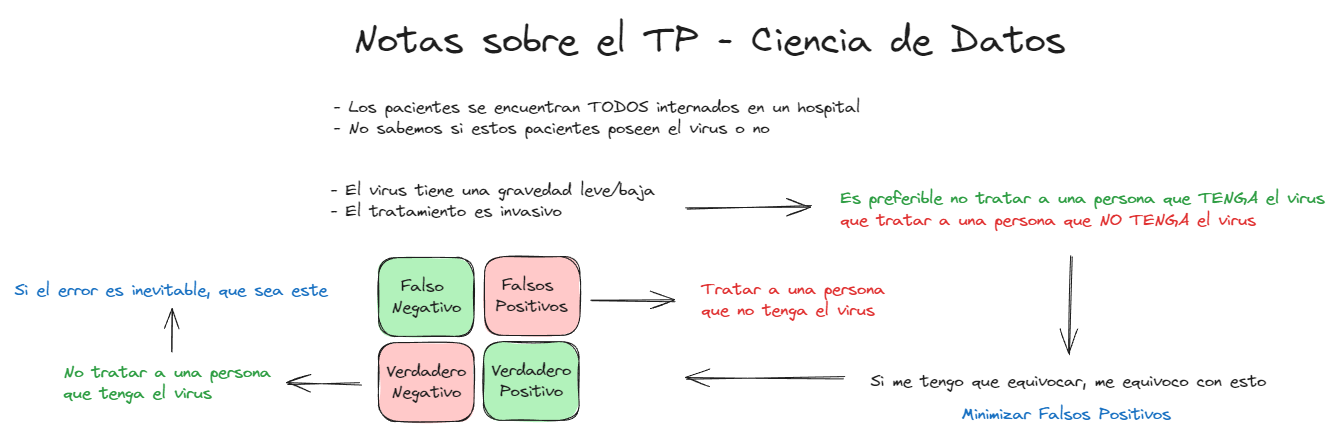

Este diagrama lo hice con esta aplicacion: https://excalidraw.com/

## Analisis del Dataset

### Cargamos el dataset

In [1]:
import pandas as pd
df = pd.read_csv("./dataset.csv")
df.head()

,Edad,Genero,Peso,Laboral,hijos,BLD01,REC1,REC2,REC3,REC4,REC5,BLD02,BLD03,LVL,target
0,9.0,Femenino,36.410602,Inactivo,0,3.139714,6.929112,63.712640,73.880613,15.087239,90.400193,2.015331,1.633836,51.411632,0
1,58.0,Masculino,115.507184,Inactivo,4,2.953914,4.660136,64.582610,73.669319,14.503106,90.817947,0.973317,-0.439358,1000000.000000,0
2,74.0,Masculino,81.249035,Activo,3,1.365200,3.005861,63.613454,75.103984,14.077988,91.741638,3.243344,0.380413,1000000.000000,1
3,NaN,Masculino,77.985589,No_declara,0,2.329285,4.344642,64.433115,73.402436,15.583846,91.741709,3.188290,-0.226046,NaN,0
4,1.0,Femenino,13.446208,Inactivo,0,-0.062975,3.938741,65.122602,75.007982,16.961593,90.668625,2.729202,0.589698,21.627303,1


### Chequeamos los nulos del dataset

In [2]:
df.isnull().sum()

Edad        822
Genero     1682
Peso          0
Laboral       0
hijos         0
BLD01         0
REC1          0
REC2          0
REC3          0
REC4          0
REC5          0
BLD02         0
BLD03         0
LVL         527
target        0
dtype: int64

#### Eliminamos columnas con nulos

In [3]:
df = df.drop('Edad', axis=1)
df = df.drop('Genero', axis=1)
df = df.drop('LVL', axis=1)
df.head()

,Peso,Laboral,hijos,BLD01,REC1,REC2,REC3,REC4,REC5,BLD02,BLD03,target
0,36.410602,Inactivo,0,3.139714,6.929112,63.712640,73.880613,15.087239,90.400193,2.015331,1.633836,0
1,115.507184,Inactivo,4,2.953914,4.660136,64.582610,73.669319,14.503106,90.817947,0.973317,-0.439358,0
2,81.249035,Activo,3,1.365200,3.005861,63.613454,75.103984,14.077988,91.741638,3.243344,0.380413,1
3,77.985589,No_declara,0,2.329285,4.344642,64.433115,73.402436,15.583846,91.741709,3.188290,-0.226046,0
4,13.446208,Inactivo,0,-0.062975,3.938741,65.122602,75.007982,16.961593,90.668625,2.729202,0.589698,1


#### Verificamos que no queden columnas con valores nulos

In [4]:
df.isnull().sum()

Peso       0
Laboral    0
hijos      0
BLD01      0
REC1       0
REC2       0
REC3       0
REC4       0
REC5       0
BLD02      0
BLD03      0
target     0
dtype: int64

### Chequeamos los `string` del dataset

Note que la columna `Laboral` es de tipo `string` y ademas no fue eliminada hasta ahora, porque no contiene nulos.

Para poder entrenar el modelo, necesito pasar todos los datos a numeros de tipo `float`.

Primero, vamos a analizar los `string` que contiene esta columna y despues vamos a ver la forma de mappear estos `string` a `float`

In [5]:
df['Laboral'].unique()

array(['Inactivo', 'Activo', 'No_declara'], dtype=object)

Son solo 3 `string` que estan presentes en la columna `Laboral`

- Inactivo   -> 0
- Activo     -> 1
- No_declara -> 2

In [6]:
df['Laboral'] = df['Laboral'].replace({'Inactivo': 0, 'Activo': 1, 'No_declara': 2})

C:\Users\Facundo\AppData\Local\Temp\ipykernel_32428\3580354159.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Laboral'] = df['Laboral'].replace({'Inactivo': 0, 'Activo': 1, 'No_declara': 2})


In [7]:
df.head()

,Peso,Laboral,hijos,BLD01,REC1,REC2,REC3,REC4,REC5,BLD02,BLD03,target
0,36.410602,0,0,3.139714,6.929112,63.712640,73.880613,15.087239,90.400193,2.015331,1.633836,0
1,115.507184,0,4,2.953914,4.660136,64.582610,73.669319,14.503106,90.817947,0.973317,-0.439358,0
2,81.249035,1,3,1.365200,3.005861,63.613454,75.103984,14.077988,91.741638,3.243344,0.380413,1
3,77.985589,2,0,2.329285,4.344642,64.433115,73.402436,15.583846,91.741709,3.188290,-0.226046,0
4,13.446208,0,0,-0.062975,3.938741,65.122602,75.007982,16.961593,90.668625,2.729202,0.589698,1


### Chequeamos si esta balanceado el dataset

target
0    2493
1    1707
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

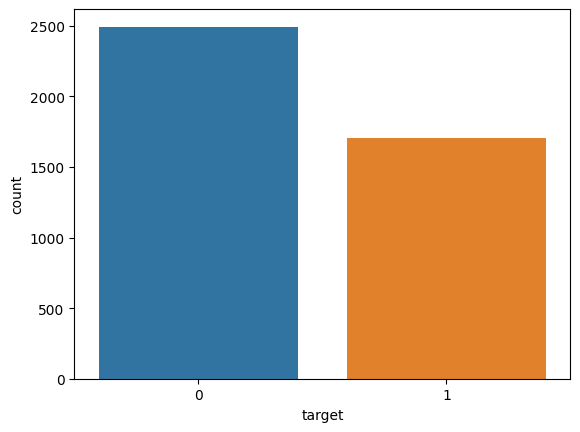

In [8]:
import seaborn as sns
print( df.target.value_counts() )
sns.countplot(x='target', data=df, hue='target', legend=False)

#### Analisis de los datos obtenidos

In [9]:
target_counts = df['target'].value_counts()
target_proportion = target_counts / target_counts.sum()

print("Un " + str(round(100 * target_proportion[0], 2)) + "% de los casos son negativos, es decir no poseen el virus.")
print("Un " + str(round(100 * target_proportion[1], 2)) + "% de los casos son positivos, es decir poseen el virus.")


Un 59.36% de los casos son negativos, es decir no poseen el virus.
Un 40.64% de los casos son positivos, es decir poseen el virus.


Viendo estos resultados, considero que el dataset esta lo suficientemente balanceado. Incluso este dataset tiene mas resultados negativos que positivos, lo cual es algo preferible en el caso de estar ligeramente desbalanceado, como es el caso; ya que permite que si hay error en la prediccion sea por `Verdaderos_Negativos` en lugar de `Falsos_Positivos`

- `Verdaderos_Negativos`: Personas que tienen el virus, pero la prediccion dice que no los tienen
- `Falsos_Positivos`: Personas que no tienen el viruso, pero la prediccion dice que si lo tienen.

### Chequeamos valores anamolos y outliers

Deberiamos primero probar el funcionamiento del modelo sin aplicar ninguna tecnica, y despues ir viendo el comportomiento del modelo a medida que le aplicamos las tecnicas

#### Clase Outliers

In [10]:
class Outliers:
    def __init__(self, df: pd.DataFrame, column_name: str):
        self.df = df
        self.column_name = column_name
        self.outliers = self.calculate()
    
    def calculate(self):
        Q1 = self.df[self.column_name].quantile(0.25)
        Q3 = self.df[self.column_name].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        return self.df[(self.df[self.column_name] < lower_bound) | (self.df[self.column_name] > upper_bound)]

    def replace_with(self, value: float):
        self.df.loc[self.outliers.index, self.column_name] = value
    
    def replace_with_mean(self):
        self.replace_with(self.df[self.column_name].mean())

    def outliers_length(self):
        return len(self.outliers)

In [11]:
def resolve_outliers(column_name: str, df: pd.DataFrame): 
    outliers = Outliers(df, column_name)
    print("La cantidad de outliers con " + column_name + " son: " + str(outliers.outliers_length()))
    print("Histograma inicial")
    df[column_name].plot(kind='hist')

#### BLD01

La cantidad de outliers con BLD01 son: 56
Histograma inicial


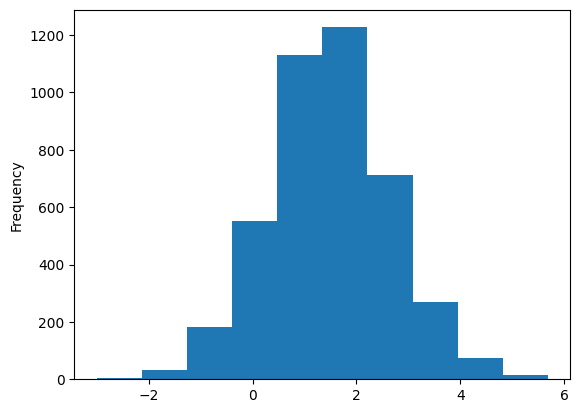

In [12]:
resolve_outliers('BLD01', df)

#### BLD02

La cantidad de outliers con BLD02 son: 55
Histograma inicial


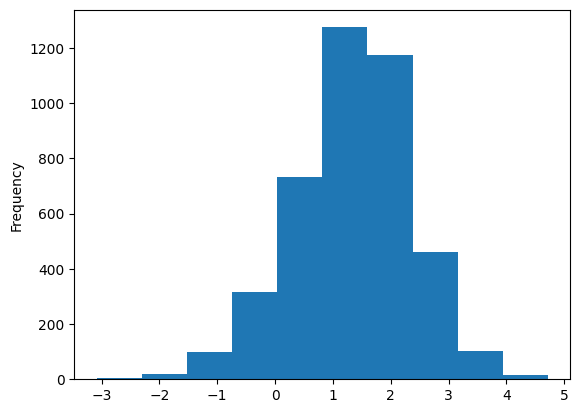

In [13]:
resolve_outliers('BLD02', df)

#### BLD03

La cantidad de outliers con BLD03 son: 68
Histograma inicial


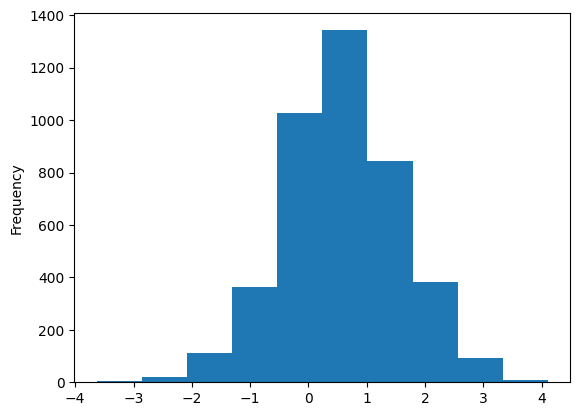

In [14]:
resolve_outliers('BLD03', df)

#### REC1

La cantidad de outliers con REC1 son: 26
Histograma inicial


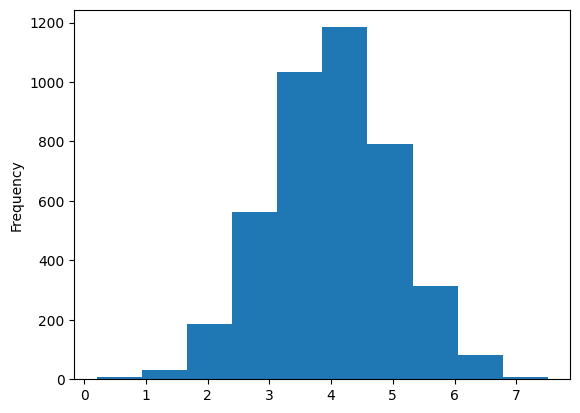

In [15]:
resolve_outliers('REC1', df)

#### REC2

La cantidad de outliers con REC2 son: 23
Histograma inicial


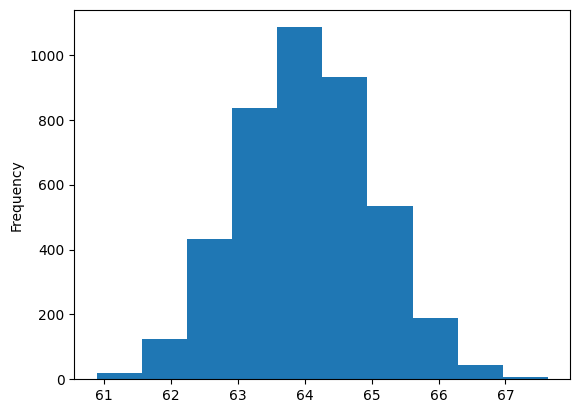

In [16]:
resolve_outliers('REC2', df)

#### REC3

La cantidad de outliers con REC3 son: 40
Histograma inicial


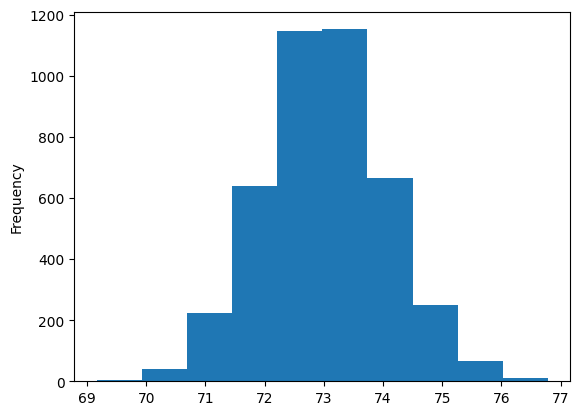

In [17]:
resolve_outliers('REC3', df)

#### REC4

La cantidad de outliers con REC4 son: 30
Histograma inicial


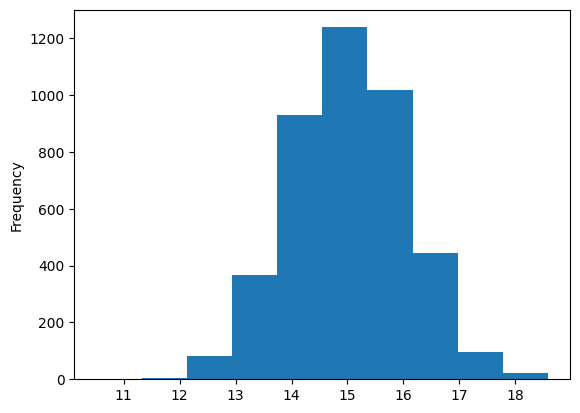

In [18]:
resolve_outliers('REC4', df)

#### REC5

La cantidad de outliers con REC5 son: 27
Histograma inicial


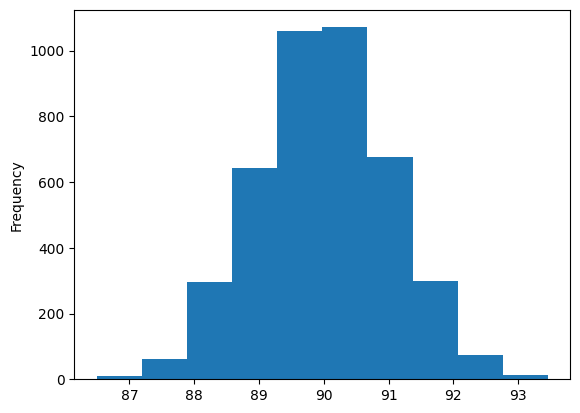

In [19]:
resolve_outliers('REC5', df)

## Entrenamiento

### Modelos de Entrenamiento

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

class Models:
    def __init__(self) -> None:
        pass

    def gaussian(self) -> GaussianNB:
        return GaussianNB()
    
    def decission_tree_classfier(self, max_depth: int, random_state: int) -> DecisionTreeClassifier:
        return DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    
    def logistic_regression(self) -> LogisticRegression:
        return LogisticRegression()

### Separacion de datos para tests y entrenamiento

#### Separo mi variable objetivo del dataframe a entrenar

In [21]:
X_target = df.drop('target', axis=1)
Y_target = df['target']

##### Dataframe sin la variable objetivo

In [22]:
X_target.head()

,Peso,Laboral,hijos,BLD01,REC1,REC2,REC3,REC4,REC5,BLD02,BLD03
0,36.410602,0,0,3.139714,6.929112,63.712640,73.880613,15.087239,90.400193,2.015331,1.633836
1,115.507184,0,4,2.953914,4.660136,64.582610,73.669319,14.503106,90.817947,0.973317,-0.439358
2,81.249035,1,3,1.365200,3.005861,63.613454,75.103984,14.077988,91.741638,3.243344,0.380413
3,77.985589,2,0,2.329285,4.344642,64.433115,73.402436,15.583846,91.741709,3.188290,-0.226046
4,13.446208,0,0,-0.062975,3.938741,65.122602,75.007982,16.961593,90.668625,2.729202,0.589698


##### Los resultados de cada una de las filas del dataframe `X_target`

In [23]:
Y_target.head()

0    0
1    0
2    1
3    0
4    1
Name: target, dtype: int64

#### Separacion en conjunto de pruebas y conjunto de tests

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_target, Y_target, test_size=0.2, stratify = Y_target, random_state=0)

### Definicion del modelo de entrenamiento

In [25]:
models = Models()
model = models.gaussian()

#### Entrenamos al clasificador

In [26]:
model.fit(X_train, y_train)

GaussianNB()

#### Resultados obtenidos

Exactitud (accuracy) del modelo: 72.26 %


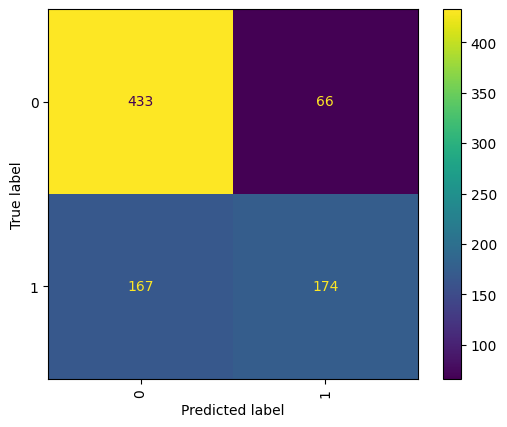

In [27]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred)*100))

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,  xticks_rotation="vertical")

Viendo estos resultados, tanto el % de accurracy como la matriz de confusion; me doy cuenta que se puede mejorar bastante la prediccion, ya que hay 83 casos que fueron `Falsos_Positivos` que son los casos que queremos evitar a toda costa.

Se equivoca bastante, diciendo que no tienen el virus cuando en realidad si lo tienen `Falsos_Negativos` habria que ajustar este tambien, pero el mas importante sigue siendo los `Falsos_Positivos`

## Evaluacion final - Docente + Alumno

In [5]:
"""
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

PRODUCCION = False
best_clf = None #Asignar aqui el mejor clasificador posible (previamente entrenado)

#Leemos el dataset de evaluaciÃ³n, simulando producciÃ³n
if PRODUCCION==False:
    df = pd.read_csv("./dataset.csv")
    _, df = train_test_split(df, test_size=0.3, random_state=42)
else:
    df = pd.read_csv("TP_Virus_Evaluacion.csv")
#Dividimos en target y predictoras

X_prod = df.drop("target", axis=1)
y_prod = df["target"]

#Transformaciones


#EvaluaciÃ³n final
y_pred = best_clf.predict(X_prod)
print(classification_report(y_prod, y_pred))
"""